# Линейная регрессия

## Теоретическая часть

## Построение предсказаний

__Вспомнить из лекции:__
* Как выполняются предсказания с помощью модели линейной регрессии?
* Как интерпретировать веса в модели линейной регрессии?

### **Задача 1**.

Какие предсказания сделает линейная модель

$$a(x) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

для объекта $x = (7, -3, 2)$, вектора весов $w = (0.5, 1.5, -2)$ и сдвига $b=10$?



**Решение.**

In [ ]:
# решение 1

a_x = 7 * 0.5 + (-3) * 1.5 + 2 * (-2) + 10

print(f'a(x) = {a_x}')

a(x) = 5.0


In [ ]:
# решение 2

import numpy as np

x = np.array([7, -3, 2])
w = np.array([0.5, 1.5, -2])
b = 10

print(f'a(x) = {x @ w + b}')

a(x) = 5.0


### **Задача 2**.

Дана матрица $X$ размера $\ell \times (d+1)$, $\ell$ - число объектов, $(d+1)$ - число признаков. В матрицу $X$ входит константный признак, который равен 1 для всех объектов. Также дан вектор весов $w$ длины $(d+1)$. Записать в матричном виде (через матричное произведение), как будут выполняться предсказания для этой матрицы.

Указать размерности всех матриц, входящих в формулу, проверить корректность выполнения матричных операций (с точки зрения размерности).

**Решение.** 

текст решения:
* Строка — описание объекта
* Столбец — значение признака на разных объектах (X)

$X = \begin{pmatrix}
     x_{00} & x_{01} & ... & 1 \\
     x_{10} & x_{11} & ... & 1 \\
     . . . &  . . . & . . . & . . .  \\
     x_{n0} & x_{n1} & ... & 1
     \end{pmatrix}$ , $\in R^{n * m}$, n = $\ell$, m = $(d+1)$


$w = \begin{pmatrix}
     w_{0} \\
     w_{1} \\
     w_{2} \\
     ... \\
     w_{m} \\
     \end{pmatrix} $ , $\in R^{m * 1}$, m = $(d+1)$

$
   X$$ \cdot w =
   \begin{pmatrix}
    x_{00}*w_{0} & + & x_{01}*w_{1} & + & ... & + & 1*w_{m}  \\
    x_{10}*w_{0} & + & x_{11}*w_{1} & + & ... & + & 1*w_{m}  \\
    . . . &   & . . . &   & . . . &     \\
    x_{n0}*w_{0} & + & x_{n1}*w_{1} & + & ... & + & 1*w_{m}  \\
   \end{pmatrix} $ , $\in R^{n * m}$, n = $\ell$, m = $(d+1)$

### **Задача 3**.

Визуализируйте решающее правило для $d=1$, $w_1=3$, $w_0=-2$. За что отвечает сдвиг $w_0$? Почему исключение сдвига из модели $w_0=0$, скорее всего, ухудшит качество предсказаний?


**Решение.** 

1. $\begin{align}a(x) = 3 x_1 -2\end{align}$
<br><br>
2. $\begin{align}a(x) = 3 x_1\end{align}$<br><br>$w_0$ — ордината точки пересечения прямой с осью ордина

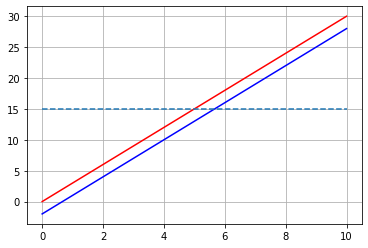

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x=np.linspace(0,10,100)

y1=[]
y2=[]
for i in x:
  y1+=[i*3-2]  #1
  y2+=[i*3]    #2

ax.plot(x,y1, color="blue")
ax.plot(x,y2, color="red")
ax.plot([0, 10], [15, 15], linestyle="dashed")
ax.grid()

### **Вопрос:** 

Какой геометрический объект задает решающее правило линейной регрессии в трехмерном случае (два признака)? В многомерном случае (больше двух признаков)?


**Ответ на вопрос:** 

1. Плоскость — $3D$
2. Гиперплоскост — $nD$ где $n>3$

## Обучение линейной регрессии
__Вспомнить из лекции:__
* Как выполняется обучение линейной регрессии на основе среднеквадратической ошибки? 
* Какой функционал при этом минимизируется?
* Как выглядит аналитическое решение задачи обучения (формула для определения весов)?
* Почему на практике не используется аналитическое решение?
* Каков оптимизационный алгоритм (как рассчитываются веса)?

### **Задача 4**.

Даны матрица объекты-признаки $X$ размера $\ell \times (d+1)$, вектор правильных ответов $Y$ длины $\ell$ и вектор весов $w$ длины $(d+1)$, $\ell$ - число объектов, $(d+1)$ - число признаков. Указать все ошибки, допущенные в записи выражения для среднеквадратичной ошибки:

$$\| Xw - Y \| = \frac 1 \ell \sum_{j=1}^d \bigl ( \sum_{i=1}^\ell x_{ij} w_{j} - y_j   \bigr )^2$$


Записать правильное выражение.

**Решение.** 

Ошибки:
1. $d$ должна быть $d+1$<br><br>
2. суммы надо поменять местами $\sum_{i=1}^\ell$ и $\sum_{j=1}^d$<br><br>
3. $\sum_{j=1}^{d+1} x_{ij} w_{j} - y_j$ в этой части $y_j$ станет $y_i$

Правильное выражение:

$$\| Xw - Y \| = \frac 1 \ell \sum_{i=1}^\ell \bigl ( \sum_{j=1}^{d+1} x_{ij} w_{j} - y_i   \bigr )^2$$

## Практическая часть

Реализуем класс линейной регрессии, соответствующий интерфейсу **sklearn**, в котором обучение будет реализовано путем применения аналитического метода. 

Тестирование класса выполним на наборе данных **boston** (хранится в модуле **datasets**), который содержит характеристики и стоимость домов.

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Загрузка набора данных и вывод информации о ключах (характеризуют содержимое набора)
boston = load_boston()
boston.keys()

In [ ]:
# Формирование матрицы признаков и вектора ответов
X = boston["data"]
y = boston["target"]

In [ ]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
X.shape

(506, 13)

Добавьте единичный столбец в X и сохраните результат в переменную X_with1:

In [ ]:
### Код, реализующий добавление единичного столбца
# (506, 13) -> (506, 14)

X_with1 = np.append(X, np.ones((X.shape[0], 1), dtype=np.int64), axis=1)

In [ ]:
X_with1

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        1.0000e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        1.0000e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        1.0000e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        1.0000e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        1.0000e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.0000e+00]])

Разделим обе выборки на обучение и контроль, зафиксировав random_state, чтобы разбиение в обоих случаях выполнялось одинаково:

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=10)
X_tr_with1, X_te_with1, y_tr, y_te = train_test_split(X_with1, y, random_state=10)

In [ ]:
X_tr.shape, y_tr.shape, X_tr_with1.shape, X_te_with1.shape

((379, 13), (379,), (379, 14), (127, 14))

Реализуйте методы **fit** и **predict**. Интерфейс соответствует стандартному интерфейсу **sklearn**. 

Напоминание: в машинном обучении классы удобно использовать, чтобы сохранять значения параметров внутри класса после обучения. У класса две основные функции: **fit** (производит обучение по обучающей выборке) и **predict** (выполняет предсказания для заданной выборки). Функция **fit** вызывается один раз, после чего параметры (в данном случае веса) сохраняются внутри класса. После обучения можно много раз вызывать функцию **predict**, чтобы выполнять предсказания на разных выборках. При этом будут использоваться сохраненные внутри класса веса. 

В методе **fit** нужно реализовать вычисление весов по формуле $w = (X^T X)^{-1} X^T Y$ и сохранить в self., в методе **predict** - вернуть предсказания по формуле $X w$ (см. задачи выше), используя сохраненный вектор весов. 

In [ ]:
class LinearRegression:
    def __init__(self, learning_method="analytical"):
        self.learning_method = learning_method
        
    def fit(self, X, y):
        if self.learning_method == "analytical":
            ### код, реализующий вычисление весов
            transposed = X.T
            self.w = np.linalg.pinv(transposed @ X) @ transposed @ y
        else:
            pass

    def predict(self, X):
        ### код, реализующий получение предсказаний
        return X @ self.w

Проверим качество работы полученной модели. Сравним работу модели с константным признаком и без него.

In [ ]:
regr = LinearRegression("analytical")
regr.fit(X_tr, y_tr)
print("train error:", mean_squared_error(regr.predict(X_tr), y_tr))
print("test error:", mean_squared_error(regr.predict(X_te), y_te))

train error: 20.696849469975195
test error: 35.89242405295906


In [ ]:
regr = LinearRegression("analytical")
regr.fit(X_tr_with1, y_tr)
print("train error:", mean_squared_error(regr.predict(X_tr_with1), y_tr))
print("test error:", mean_squared_error(regr.predict(X_te_with1), y_te))

train error: 18.87900085091601
test error: 32.442536696004495


Как и следовало ожидать, качество работы алгоритма с константным признаком лучше, чем без него ($w_0=0$).

Качество работы алгоритма на тестовых данных хуже, чем на обучающей выборке - это стандартная ситуация в машинном обучении.

### Задание (дополнительно).

Реализовать обучение линейной регрессии с помощью градиентного спуска. В этом случае следует дополнительно учесть следующие моменты.
* Выборку X необходимо масштабировать (можно использовать sklearn.preprocessing.Normalizer)
* Длину шага нужно настроить так, чтобы градиентный спуск не расходился (начать с большой, с постепенным уменьшением). Рекомендация: контролировать изменение ошибки в процессе обучения.
* Может понадобиться выполнить большое число итераций (порядка миллиона).

**Внимание:** все вычисления - ТОЛЬКО В МАТРИЧНОЙ ФОРМЕ. Циклы можно использовать только для организации итераций.